In [1]:
import json
 
# Opening JSON file
f = open('logins.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
for i in data:
    print(i)
 
# Closing file
f.close()

login_time


In [18]:
#extract timestamps
login_times = list(data.values())

In [27]:
#extract login times as a single list
login_times= login_times[0]

In [10]:
import pandas as pd

In [28]:
#create dataframe from login times
df = pd.DataFrame({'login_times':login_times})

In [33]:
#add a count column to sum when we aggregate into 15m intervals
df['Count'] = 1

In [40]:
#convert login times to type datetime
df['login_times'] = pd.to_datetime(df.login_times)

In [41]:
#verify data types
df.dtypes

login_times    datetime64[ns]
Count                   int64
dtype: object

In [45]:
#set the timestamps as the index
df.set_index(df.login_times, inplace = True)

In [50]:
#drop the duplicate row now that the times are listed in the index
counts_df = df.drop(columns = ['login_times'])

In [57]:
#aggregate timestamps in 15 minute interval and show login counts
aggregated_df = counts_df.resample('15min').sum()

In [85]:
import matplotlib.pyplot as plt

In [77]:
login_average = aggregated_df.Count.rolling(15).mean()

Text(0, 0.5, 'Number of Logins')

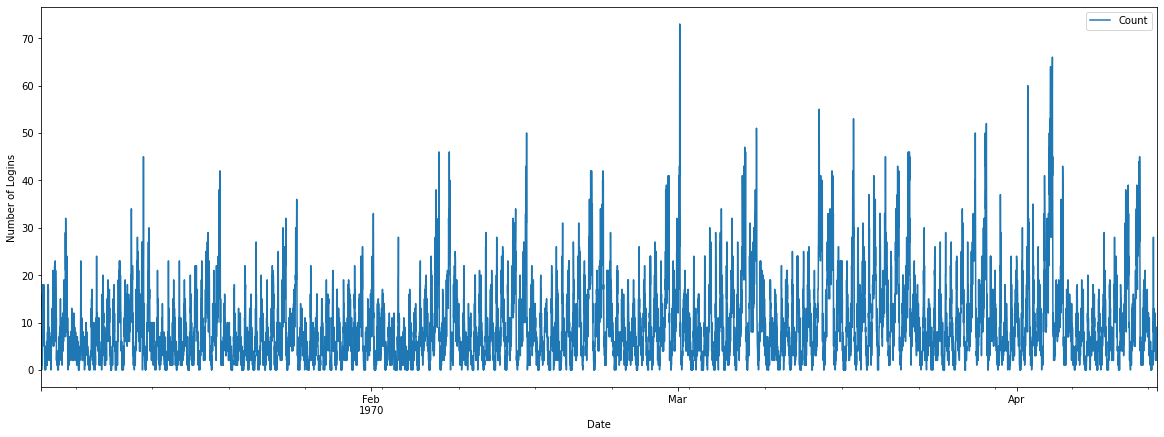

In [64]:
ax = aggregated_df.plot(figsize = (20,7))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Logins")

In [78]:
aggregated_df['Average'] = login_average

Text(0, 0.5, 'Number of Logins')

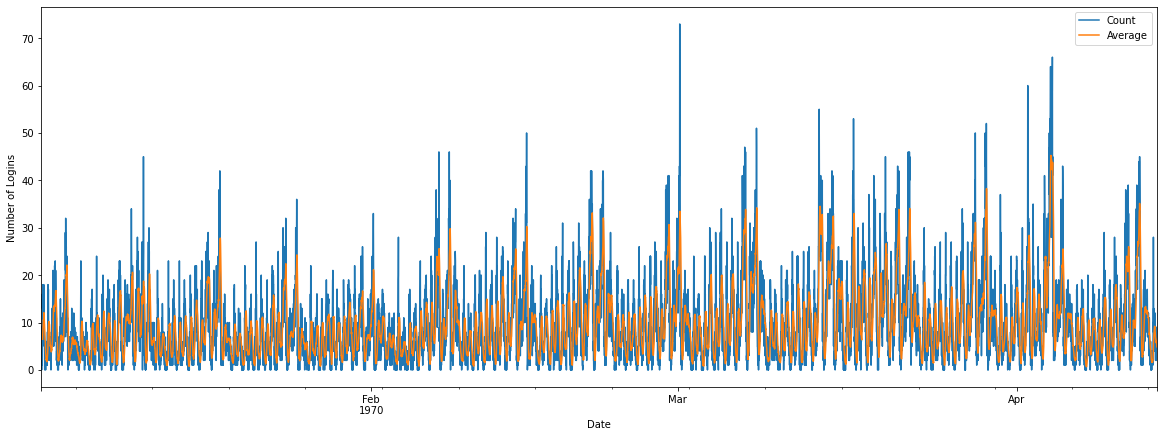

In [79]:
ax = aggregated_df.plot(figsize = (20,7))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Logins")

In [90]:
count_df = aggregated_df.drop(columns = 'Average')

In [107]:
first_week = count_df[:540]

Text(0, 0.5, 'Number of Logins')

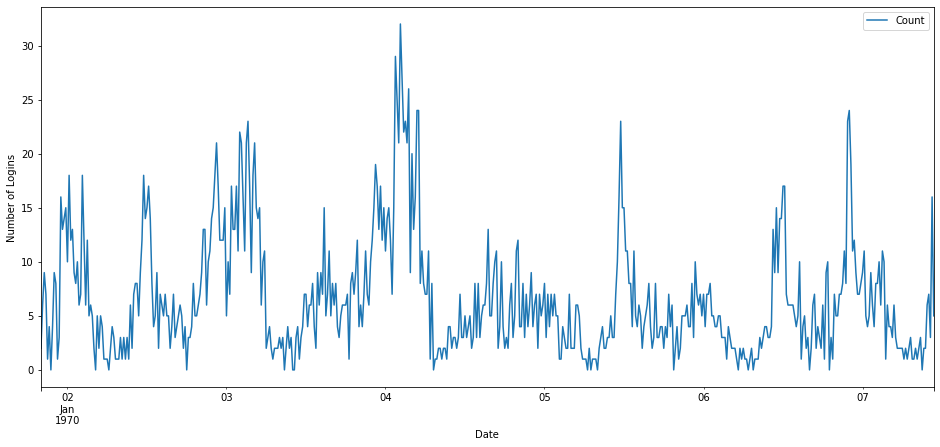

In [108]:
ax = first_week.plot(figsize = (16,7))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Logins")

Text(0, 0.5, 'Seasonal')

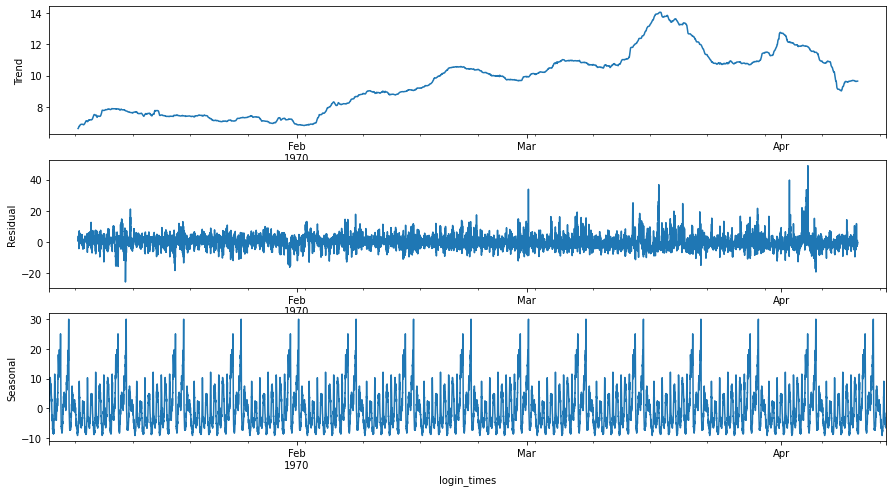

In [103]:
import statsmodels.api as sm

# Plot the original data, the trend, the seasonality, and the residuals 
decompfreq = 672
res = sm.tsa.seasonal_decompose(count_df, period= decompfreq)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

ax1.set_ylabel('Trend')
ax2.set_ylabel('Residual')
ax3.set_ylabel('Seasonal')